In [11]:
#Basic Probability
#Discrete and continuous random variables
import numpy as np
import pandas as pd

In [12]:
data={"Customer_id":range(1,11),
      "Purchases":[2,3,4,5,1,5,3,6,1,7], #DISCRETE RANDOM VARIABLES
      "Amount_Spend":[15.5, 25.0, 33.2, 60.0, 22.5, 48.0, 35.0, 14.0, 75.0, 28.0] #CONTINUOUS RANDOM VARIABLE
}
df=pd.DataFrame(data)
df

,Customer_id,Purchases,Amount_Spend
0,1,2,15.5
1,2,3,25.0
2,3,4,33.2
3,4,5,60.0
4,5,1,22.5
5,6,5,48.0
6,7,3,35.0
7,8,6,14.0
8,9,1,75.0
9,10,7,28.0


In [13]:
total=len(df)
total

10

In [14]:
customer2=df["Purchases"]>2
customer2

0    False
1     True
2     True
3     True
4    False
5     True
6     True
7     True
8    False
9     True
Name: Purchases, dtype: bool

In [15]:
sum=sum(customer2)

In [16]:
probab=sum/total
print(f"Probability of customers buying more than 2 items is: {probab:.2f}")
print("Probability is:",probab)

Probability of customers buying more than 2 items is: 0.70
Probability is: 0.7


In [17]:
#Independence
data={'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Payment_Method': ['Cash', 'Cash', 'Card', 'Card', 'Cash', 'Cash', 'Card', 'Card']
}
df=pd.DataFrame(data)
df

,Gender,Payment_Method
0,Male,Cash
1,Female,Cash
2,Male,Card
3,Female,Card
4,Male,Cash
5,Female,Cash
6,Male,Card
7,Female,Card


In [18]:
total=len(df)
total

8

In [19]:
df['Gender'] #Show the Gender column

0      Male
1    Female
2      Male
3    Female
4      Male
5    Female
6      Male
7    Female
Name: Gender, dtype: object

In [20]:
df['Gender']=='Male' #Show the boolean if Male==True otherwise False

0     True
1    False
2     True
3    False
4     True
5    False
6     True
7    False
Name: Gender, dtype: bool

In [21]:
df[df['Gender']=='Male'] 
#When you pass a boolean Series inside df[ ... ], 
#Pandas filters the DataFrame: Keeps only rows where the boolean value is True.

,Gender,Payment_Method
0,Male,Cash
2,Male,Card
4,Male,Cash
6,Male,Card


In [22]:
len(df[df['Gender']=='Male'])

4

In [23]:
p_male=len(df[df['Gender']=='Male'])/total
p_male

0.5

In [24]:
p_cash=len(df[df['Payment_Method']=='Cash'])/total
p_cash

0.5

In [25]:
(df['Gender']=='Male') & (df['Payment_Method']=='Cash')

0     True
1    False
2    False
3    False
4     True
5    False
6    False
7    False
dtype: bool

In [26]:
df[(df['Gender']=='Male') & (df['Payment_Method']=='Cash')]#& For getting both male in gender and cash in payment method

,Gender,Payment_Method
0,Male,Cash
4,Male,Cash


In [27]:
len(df[(df['Gender']=='Male') & (df['Payment_Method']=='Cash')])

2

In [28]:
p_both=len(df[(df['Gender']=='Male') & (df['Payment_Method']=='Cash')])/total
p_both 

0.25

In [29]:
if p_both==(p_male*p_cash):
    print("Both are Independent")
else:
    print("Not Independent")

Both are Independent


In [30]:
#COVARIANCE
hours= np.array([2, 4, 6, 8, 10])
scores= np.array([50, 60, 65, 80, 85])

In [31]:
#np.cov() → NumPy function to calculate a covariance matrix.
#bias=True → divides by N instead of N-1 -> means population covarinace
cov_matrix= np.cov(hours, scores, bias=True)
cov_matrix

array([[  8.,  36.],
       [ 36., 166.]])

In [32]:
# Variance is the covariance with itself
#[ [ variance(hours), covariance(hours, scores) ],
#  [ covariance(scores, hours), variance(scores) ] ] the above matrix is this.

In [33]:
cov_xy = cov_matrix[0, 1] #0 -> Row and 1-> Column element is Cov(hours, scores) 
cov_xy

36.0

In [34]:
import matplotlib.pyplot as plt

In [35]:
np.random.seed(42)
x=np.arange(1, 11)
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [36]:
y_pos= x * 2 + np.random.randint(-2, 3, size=10)
y_pos
#noise = np.random.randint(-2, 3, size=10)
#noise is also an random array like this-> noise = [1, 2, 0, 2, 2, -1, 0, 0, 0, 2]
#y_pos[i] = 2*x[i] + noise[i]

array([ 3,  6,  6, 10, 12, 11, 14, 16, 18, 22])

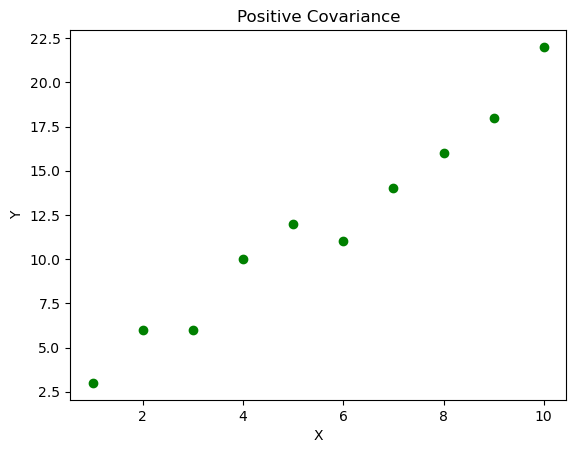

In [37]:
plt.figure() #figsize=(5, 4)
plt.scatter(x, y_pos, color='green')
plt.title("Positive Covariance")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [38]:
y_neg= -x * 2 + np.random.randint(-2, 3, size=10)
y_neg

array([ -1,  -4,  -4,  -9,  -9, -13, -13, -14, -20, -19])

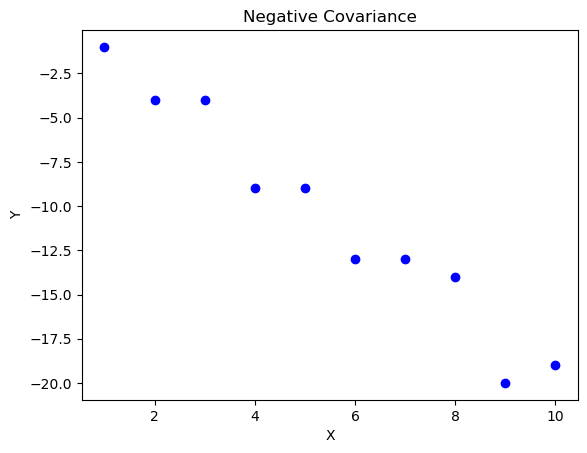

In [39]:
plt.figure()
plt.scatter(x, y_neg, color='blue')
plt.title("Negative Covariance")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [40]:
y_zero=np.random.randint(1, 20, size=10) #this is just noise 
y_zero

array([12, 17, 10, 16, 15, 15, 19, 12,  3,  5])

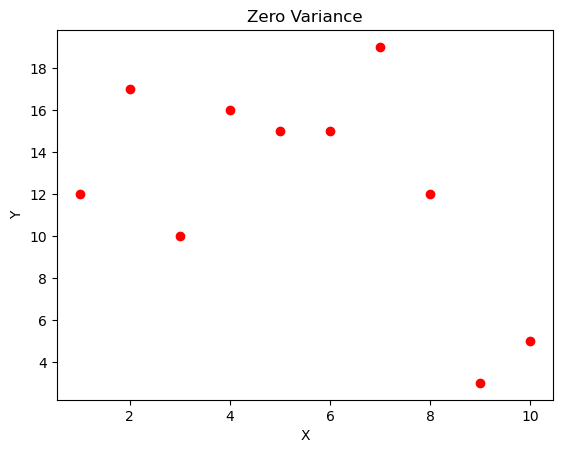

In [41]:
plt.figure()
plt.scatter(x, y_zero, color='red')
plt.title("Zero Variance")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [42]:
x=[2, 4, 6, 8, 10]
y_pos=[2, 4, 6, 8, 10]
y_neg=[10, 8, 6, 4, 2]
y_zero=[3, 5, 4, 8, 11]
def sample(x,y):
    return np.cov(x, y, bias=False)[0,1]
print(sample(x, y_pos))
print(sample(x, y_neg))
print(sample(x, y_zero))

10.0
-10.0
9.5


In [43]:
#CENTRAL LIMIT THEOREM
population= np.random.exponential(scale=50, size=100000) #right skewwed data points=100000 and mean=scale=50
population

array([ 46.76665103,   9.3480626 ,   3.36319654, ..., 119.65707021,
        22.32040585,  11.99801611])

<function matplotlib.pyplot.show(close=None, block=None)>

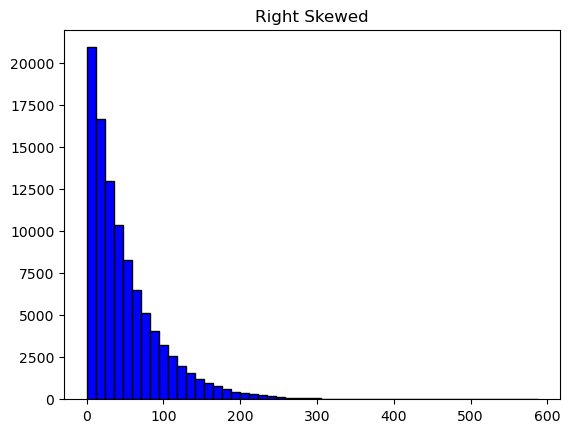

In [44]:
plt.hist(population, bins=50, color='blue', edgecolor='black')
plt.title('Right Skewed')
plt.show

In [45]:
sample_means=[]
for _ in range(10000):
    sample=np.random.choice(population, size=30, replace='False') 
    #from population choose 30 random values, replace= without repetition
    sample_means.append(np.mean(sample))

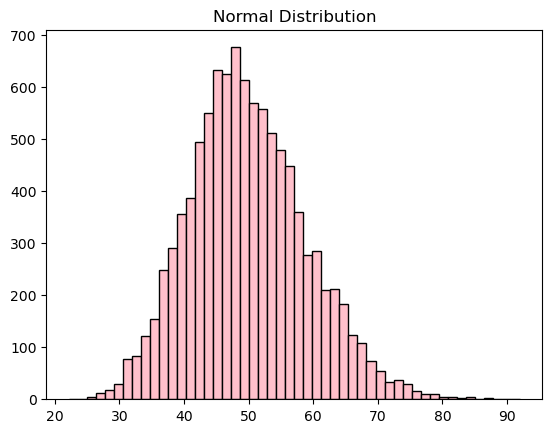

In [46]:
plt.hist(sample_means, bins=50, color='pink', edgecolor='black')
plt.title('Normal Distribution')
plt.show()